# Porównanie wyników pomiarów wydajności QuadTree and KDTree

In [5]:
# Import data libraries, graph and timers
import pandas as pd
import matplotlib.pyplot as plt
import timeit
# Imports geometry utilities
from utilities.Point import Point
from utilities.Rectangle import Rectangle
# Imports modules for testing, benchmarking and visualizing
from visualizer.main import Visualizer
from comparator.CaseGenerator import CaseGenerator
from TestManager import TestManager
# Imports data structures (and their visualizers)
from KdTree import KdTree, KdTree_visualizer
from QuadTree import QuadTree, QuadTree_visualizer

## Spis treści:
1. Sprawdzenie poprawności działania porównywanych struktur danych
2. Pomiary wydajności dla różnych rozmiarów danych oraz rodzaju danych wejściowych
3. Generowanie wykresów
4. Pomiary dla indywidulanych przypadków pod zastosowania drzewa

## 1. Sprawdzenie poprawności działania porównywanych struktur danych

KdTree:

In [7]:
KdTree_tests = TestManager(KdTree).all_tests()

Running all tests:
Test contain_point_int:
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Passed 57/57 tests.
Test contain_point_float:
++++++++++
Passed 10/10 tests.
Test points_in_rectangle_int:
++++
Passed 4/4 tests.
Test points_in_rectangle_float:
+
Passed 1/1 tests.
Passed 72/72 of all tests.


QuadTree:

In [26]:
QuadTree_tests = TestManager(QuadTree).all_tests()

Running all tests:
Test contain_point_int:
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Passed 57/57 tests.
Test contain_point_float:
++++++++++
Passed 10/10 tests.
Test points_in_rectangle_int:
++++
Passed 4/4 tests.
Test points_in_rectangle_float:
+
Passed 1/1 tests.
Passed 72/72 of all tests.


Weryfikacja:

In [27]:
assert KdTree_tests and QuadTree_tests
print("All tests passed!")

All tests passed!


## 2. Pomiary wydajności

In [19]:
cg = CaseGenerator()
q_int = [10000*val for val in range(1, 11)]
q_2int = [(val//2, val//2) for val in q_int]
q_grid = [(100, val//100) for val in q_int]
q_clust = [val//3 for val in q_int]
q_out = [(val, 50) for val in q_int]

def benchmark(func, quantities, search_in=Rectangle([25, 25], [75, 75]), destination=Rectangle(Point([0,0]), Point([100,100])), cluster=None, title="Benchmark"):
    global q_int
    data = []
    data2 = []
    for q in quantities:
        if cluster is not None:
            points = func(q, cluster)
        else:
            points = func(q, destination)
        tkk = timeit.timeit(lambda: KdTree(points, points_in_node=1), number=1)
        tqk = timeit.timeit(lambda: QuadTree(points, points_in_node=1), number=1)
        kd = KdTree(points, points_in_node=1)
        qt = QuadTree(points, points_in_node=1)
        tks = timeit.timeit(lambda: kd.search_in_rectangle(search_in), number=1)
        tqs = timeit.timeit(lambda: qt.search_in_rectangle(search_in), number=1)
        data.append([tkk, tqk])
        data2.append([tks, tqs])
    qua = ["Liczba punktów"]    
    col = ["KdTree", "QuadTree"]
    top = ["", "Czas konstrukcji [s]", "Czas przeszukiwania [s]"]
    idx = list(range(1, len(quantities) + 1))
    df = pd.concat([pd.concat([pd.DataFrame(q_int, columns=qua, index=idx), 
                    pd.DataFrame(data, columns=col, index=idx), 
                    pd.DataFrame(data2, columns=col, index=idx)], axis=1, keys=top)], axis=1, keys=[title])
    return df


2.1 Rozkład jednorodny

In [31]:
df1 = benchmark(cg.uniform_distribution, q_int, title="Rozkład jednorodny")
df1

Rozkład jednorodny                                                         \
                      Czas konstrukcji [s]           Czas przeszukiwania [s]   
       Liczba punktów               KdTree  QuadTree                  KdTree   
1               10000             0.400514  0.337288                0.007415   
2               20000             0.877964  0.658468                0.014701   
3               30000             1.071073  0.993500                0.008696   
4               40000             0.844817  0.949317                0.007280   
5               50000             1.077030  1.158184                0.008306   
6               60000             1.321289  1.420434                0.010153   
7               70000             1.675156  1.864655                0.011783   
8               80000             2.475293  2.762264                0.017770   
9               90000             2.298655  2.030491                0.011863   
10             100000             2.138730  2.184581                0.015771   

              
              
    QuadTree  
1   0.009203  
2   0.017589  
3   0.016198  
4   0.016366  
5   0.016992  
6   0.027001  
7   0.030694  
8   0.030711  
9   0.027061  
10  0.051574

2.2 Rozkład normalny

In [7]:
df2 = benchmark(cg.normal_distribution, q_int, title="Rozkład normalny")
df2

Rozkład normalny                                                         \
                    Czas konstrukcji [s]           Czas przeszukiwania [s]   
     Liczba punktów               KdTree  QuadTree                  KdTree   
1             10000             0.248292  0.343899                0.007311   
2             20000             0.440874  0.644877                0.013659   
3             30000             0.770906  1.019354                0.013562   
4             40000             0.966586  1.382884                0.017903   
5             50000             1.602303  1.974464                0.028218   
6             60000             1.648528  2.149391                0.026649   
7             70000             1.785544  2.770105                0.024198   
8             80000             1.839800  2.679575                0.038679   
9             90000             2.652362  3.309833                0.037055   
10           100000             2.620872  3.351571                0.040562   

              
              
    QuadTree  
1   0.008887  
2   0.019415  
3   0.028699  
4   0.040241  
5   0.055867  
6   0.055969  
7   0.056957  
8   0.156230  
9   0.081012  
10  0.187073

2.3 Rozkład "posadzka"

In [20]:
df3 = benchmark(cg.grid_distribution, q_grid, title="Rozkład siatka")
df3

KeyboardInterrupt: 

2.4.1 Rozkład klastrowy (z małą ilością punktów w przeszukiwanym obszarze) 

In [26]:
c = (Rectangle(Point([0,0]), Point([10,10])), Rectangle(Point([40,50]), Point([60,90])), Rectangle(Point([80,20]), Point([90,30])))
df4_1 = benchmark(cg.cluster_distribution, q_clust, search_in=Rectangle([9, 9], [70, 51]), cluster=c, title="Rozkład klastrowy (1)")
df4_1

Rozkład klastrowy (1)                                 \
                         Czas konstrukcji [s]             
          Liczba punktów               KdTree  QuadTree   
1                  10000             0.218159  0.312151   
2                  20000             0.591762  0.745024   
3                  30000             0.951308  1.045254   
4                  40000             1.002645  1.470761   
5                  50000             1.357840  1.943101   
6                  60000             1.759609  2.701482   
7                  70000             1.606500  2.330859   
8                  80000             1.800549  2.681454   
9                  90000             2.070932  3.110448   
10                100000             2.312955  3.397194   

                                      
   Czas przeszukiwania [s]            
                    KdTree  QuadTree  
1                 0.007819  0.001789  
2                 0.011892  0.002070  
3                 0.009616  0.002171  
4                 0.013847  0.006711  
5                 0.013809  0.003108  
6                 0.014127  0.003256  
7                 0.015246  0.003211  
8                 0.017099  0.003663  
9                 0.017087  0.004895  
10                0.018223  0.004284

2.4.2 Rozkład klastrowy (z dużą ilością punktów w przeszukiwanym obszarze)

In [27]:
c = (Rectangle(Point([0,0]), Point([10,10])), Rectangle(Point([40,50]), Point([60,90])), Rectangle(Point([80,20]), Point([90,30])))
df4_2 = benchmark(cg.cluster_distribution, q_clust, search_in=Rectangle([40, 20], [100, 70]), cluster=c, title="Rozkład klastrowy (2)")
df4_2

Rozkład klastrowy (2)                                 \
                         Czas konstrukcji [s]             
          Liczba punktów               KdTree  QuadTree   
1                  10000             0.280694  0.310834   
2                  20000             0.397486  0.612225   
3                  30000             0.605346  0.933087   
4                  40000             0.820432  1.267030   
5                  50000             1.067521  1.594501   
6                  60000             1.333933  1.938306   
7                  70000             1.510835  2.275376   
8                  80000             1.816117  2.636363   
9                  90000             2.014814  3.047339   
10                100000             2.238355  3.368295   

                                      
   Czas przeszukiwania [s]            
                    KdTree  QuadTree  
1                 0.005295  0.003927  
2                 0.007874  0.006619  
3                 0.008978  0.010731  
4                 0.011222  0.013342  
5                 0.012718  0.016212  
6                 0.014094  0.020058  
7                 0.015460  0.024520  
8                 0.016693  0.030444  
9                 0.020471  0.031531  
10                0.018255  0.036661

2.5.1 Rozkład z wartościami odstającymi (z małą ilością punktów w przeszukiwanym obszarze)

In [28]:
df5_1 = benchmark(cg.outliers_distribution, q_out, search_in=Rectangle([0,10], [90,20]), title="Rozkład z odstającymi (1)")
df5_1

Rozkład z odstającymi (1)                                 \
                             Czas konstrukcji [s]             
              Liczba punktów               KdTree  QuadTree   
1                      10000             0.237243  0.287028   
2                      20000             0.438866  0.610959   
3                      30000             0.597088  0.925644   
4                      40000             0.821814  1.237034   
5                      50000             1.047167  1.568014   
6                      60000             1.436210  1.950496   
7                      70000             1.546960  2.222077   
8                      80000             1.819917  2.554889   
9                      90000             2.043947  2.896922   
10                    100000             2.306524  3.259596   

                                      
   Czas przeszukiwania [s]            
                    KdTree  QuadTree  
1                 0.003713  0.000221  
2                 0.004173  0.000251  
3                 0.004498  0.000153  
4                 0.005722  0.000376  
5                 0.006623  0.000360  
6                 0.006926  0.000255  
7                 0.007168  0.000354  
8                 0.007575  0.000470  
9                 0.009071  0.000345  
10                0.008985  0.000192

2.5.2 Rozkład z wartościami odstającymi (z dużą ilością punktów w przeszukiwanym obszarze)

In [29]:
df5_2 = benchmark(cg.outliers_distribution, q_out, search_in=Rectangle([40,40], [80,70]), title="Rozkład z odstającymi (2)")
df5_2

Rozkład z odstającymi (2)                                 \
                             Czas konstrukcji [s]             
              Liczba punktów               KdTree  QuadTree   
1                      10000             0.224664  0.288682   
2                      20000             0.405038  0.579596   
3                      30000             0.617201  0.918855   
4                      40000             0.850125  1.245418   
5                      50000             1.082121  1.801256   
6                      60000             1.358543  1.935067   
7                      70000             1.609127  2.314374   
8                      80000             1.910103  2.684613   
9                      90000             2.130161  3.010145   
10                    100000             2.442081  3.531882   

                                      
   Czas przeszukiwania [s]            
                    KdTree  QuadTree  
1                 0.005386  0.009044  
2                 0.008213  0.010219  
3                 0.009758  0.015573  
4                 0.011883  0.018438  
5                 0.013756  0.024938  
6                 0.015784  0.037353  
7                 0.016694  0.035389  
8                 0.018178  0.038819  
9                 0.019739  0.045539  
10                0.025331  0.050400

2.6 Rozkład krzyżowy

In [4]:
df6 = benchmark(cg.cross_distribution, q_2int, search_in=Rectangle([40,25], [75, 60]), title="Rozkład krzyż")
df6

Rozkład krzyż                                                         \
                  Czas konstrukcji [s]           Czas przeszukiwania [s]   
   Liczba punktów               KdTree  QuadTree                  KdTree   
1           10000             0.210032  0.453140                0.006739   
2           20000             0.375248  1.117106                0.014751   
3           30000             0.742133  2.004977                0.013300   
4           40000             0.866847  1.993289                0.014470   
5           50000             0.988186  2.497377                0.020248   
6           60000             1.258885  2.751603                0.022686   
7           70000             2.381533  5.105392                0.021279   
8           80000             1.927808  4.904272                0.022497   
9           90000             2.654273  5.314474                0.033819   
10         100000             2.977571  5.068074                0.028338   

              
              
    QuadTree  
1   0.002489  
2   0.010223  
3   0.010486  
4   0.010381  
5   0.014974  
6   0.032589  
7   0.017927  
8   0.021644  
9   0.052525  
10  0.028965

2.7 Rozkład prostokątny

In [14]:
df7 = benchmark(cg.rectangle_distribution, q_int, search_in=Rectangle([20,20], [70,100]), title="Rozkład prostokąt")
df7

Rozkład prostokąt                                                         \
                     Czas konstrukcji [s]           Czas przeszukiwania [s]   
      Liczba punktów               KdTree  QuadTree                  KdTree   
1              10000             0.250097  0.575043                0.002518   
2              20000             0.387785  1.076900                0.003400   
3              30000             0.584623  1.585840                0.004076   
4              40000             0.803016  2.344862                0.004773   
5              50000             1.033332  2.663500                0.005316   
6              60000             1.500850  3.663884                0.006915   
7              70000             1.482161  4.489549                0.008552   
8              80000             1.779521  4.412019                0.008509   
9              90000             2.152730  5.115023                0.007641   
10            100000             2.257906  5.656776                0.010390   

              
              
    QuadTree  
1   0.001147  
2   0.002093  
3   0.002694  
4   0.003460  
5   0.004367  
6   0.005062  
7   0.006069  
8   0.007122  
9   0.010388  
10  0.008743

## 3. Generowanie wykresów

In [6]:
def show_graphs(df, title):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    fig.suptitle(title)
    ax1.title.set_text("Czas konstrukcji")
    ax1.plot(df[title][""]["Liczba punktów"], df[title, "Czas konstrukcji [s]"]["KdTree"], label="KdTree", marker="o")
    ax1.plot(df[title][""]["Liczba punktów"], df[title, "Czas konstrukcji [s]"]["QuadTree"], label="QuadTree", marker="o")
    ax1.set_ylabel("Czas konstrukcji [s]")
    ax1.set_xlabel("Liczba punktów")
    ax1.legend()
    ax2.title.set_text("Czas przeszukiwania")
    ax2.plot(df[title][""]["Liczba punktów"], df[title, "Czas przeszukiwania [s]"]["KdTree"], label="KdTree", marker="o")
    ax2.plot(df[title][""]["Liczba punktów"], df[title, "Czas przeszukiwania [s]"]["QuadTree"], label="QuadTree", marker="o")
    ax2.set_ylabel("Czas przeszukiwania [s]")
    ax2.set_xlabel("Liczba punktów")
    ax2.legend()
    plt.show()    

3.1 Rozkład równomierny

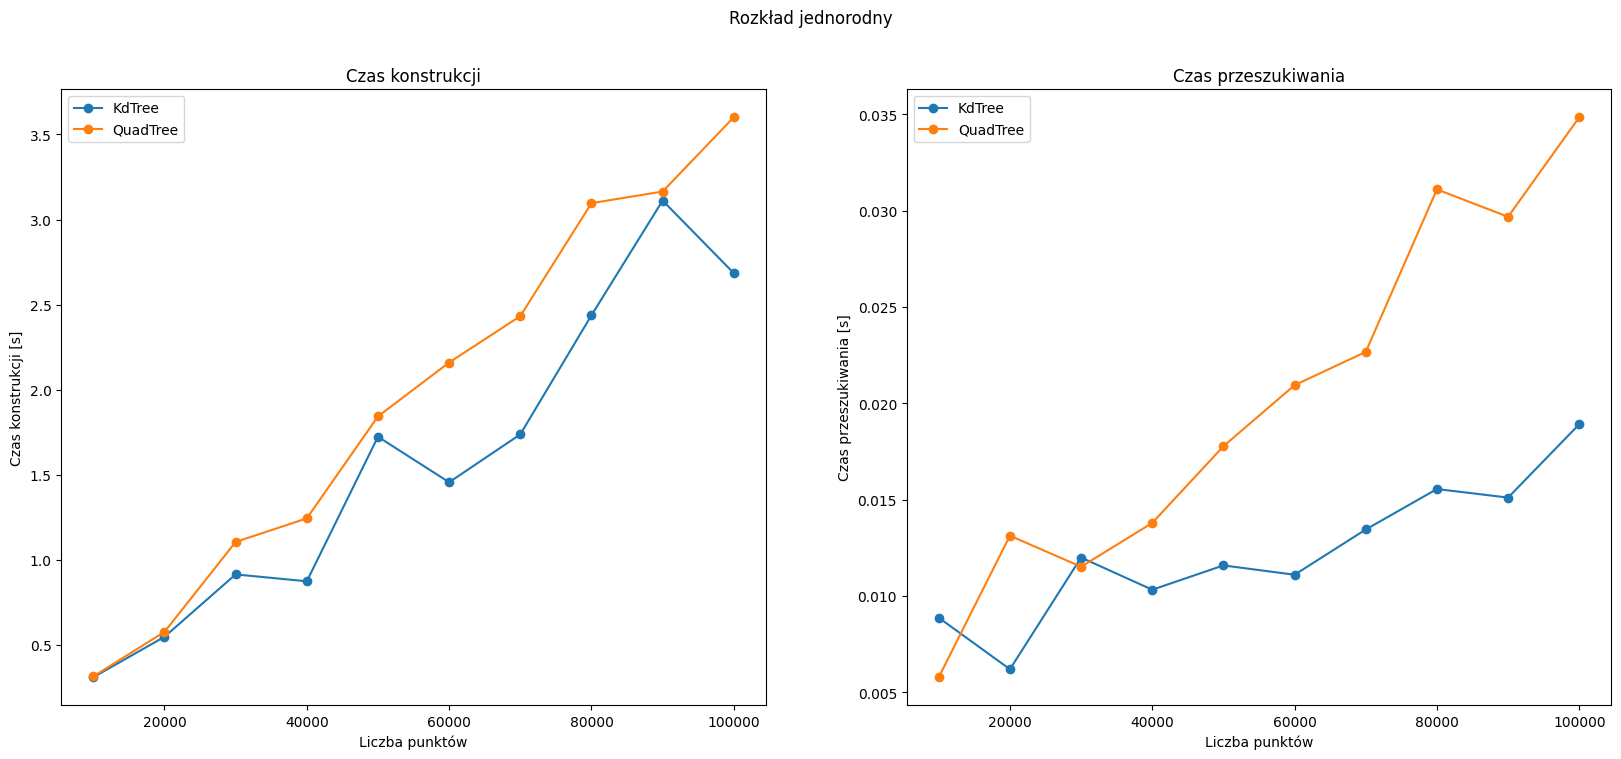

In [21]:
show_graphs(df1, "Rozkład jednorodny")

3.2 Rozkład normalny

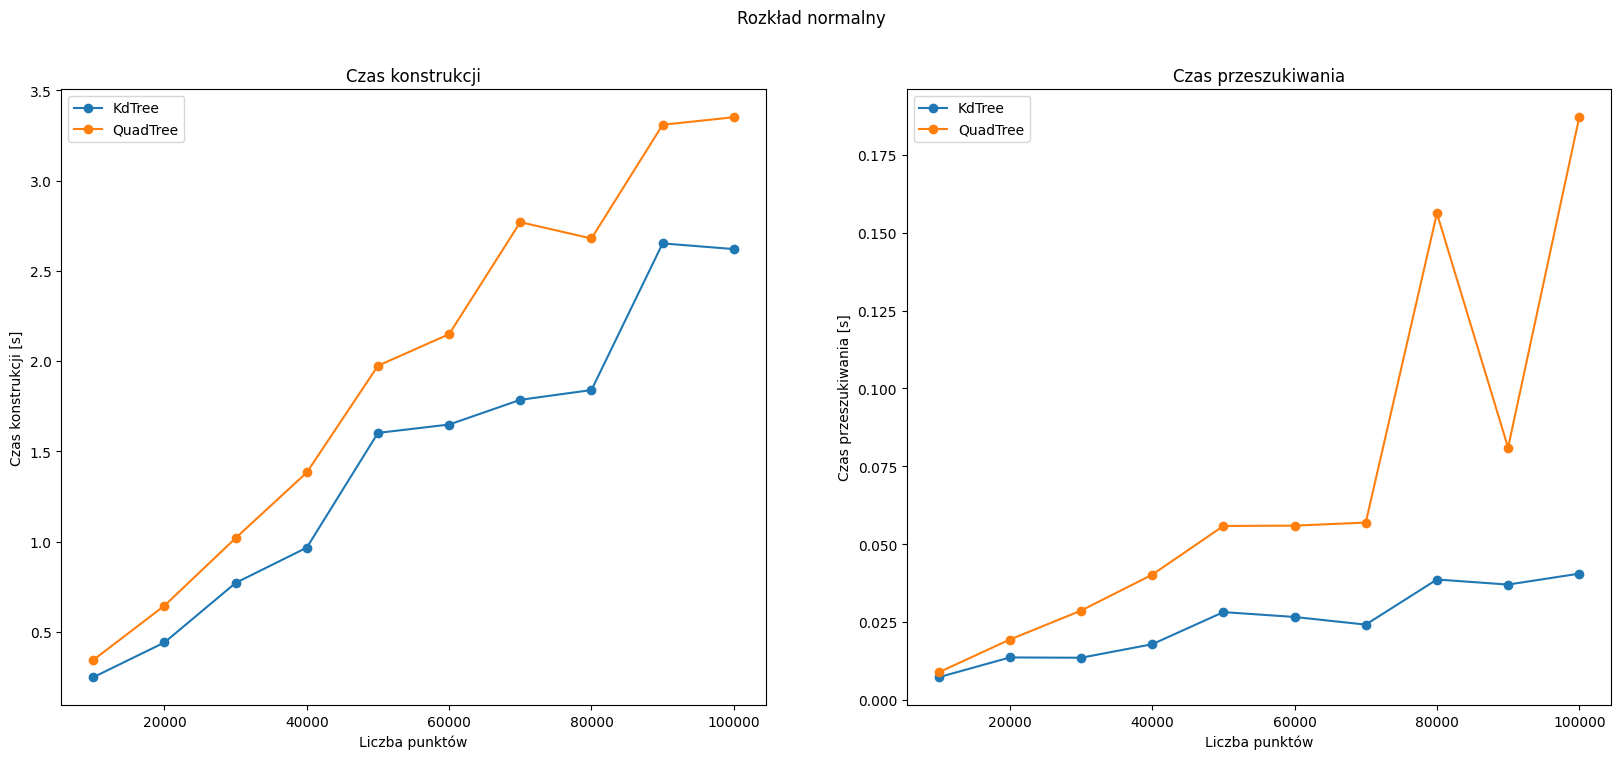

In [22]:
show_graphs(df2, "Rozkład normalny")

3.3 Rozkład "posadzka"

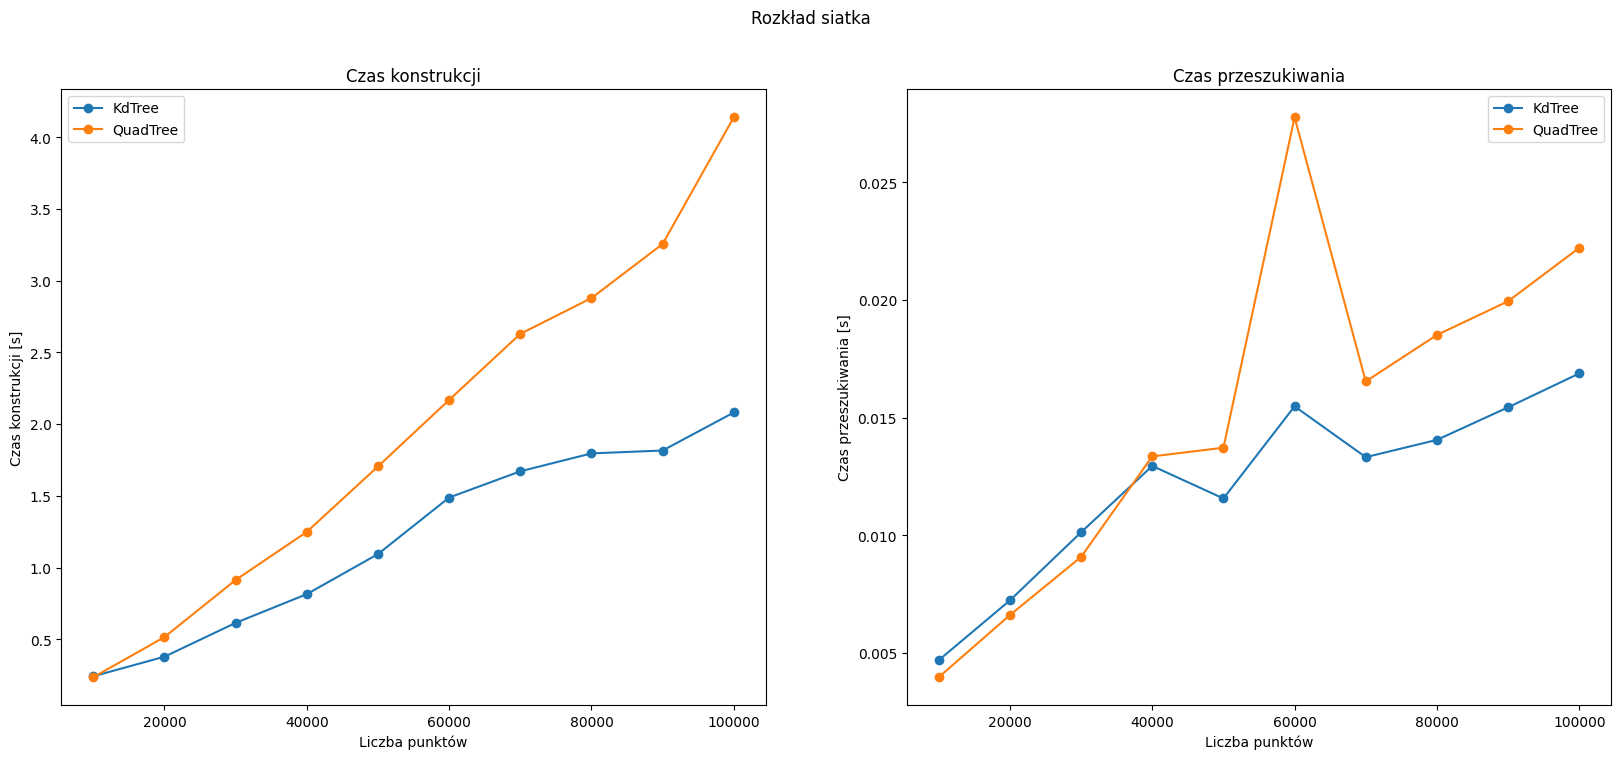

In [23]:
show_graphs(df3, "Rozkład siatka")

3.4.1 Rozkład klastrowy (z małą ilością punktów w przeszukiwanym obszarze)

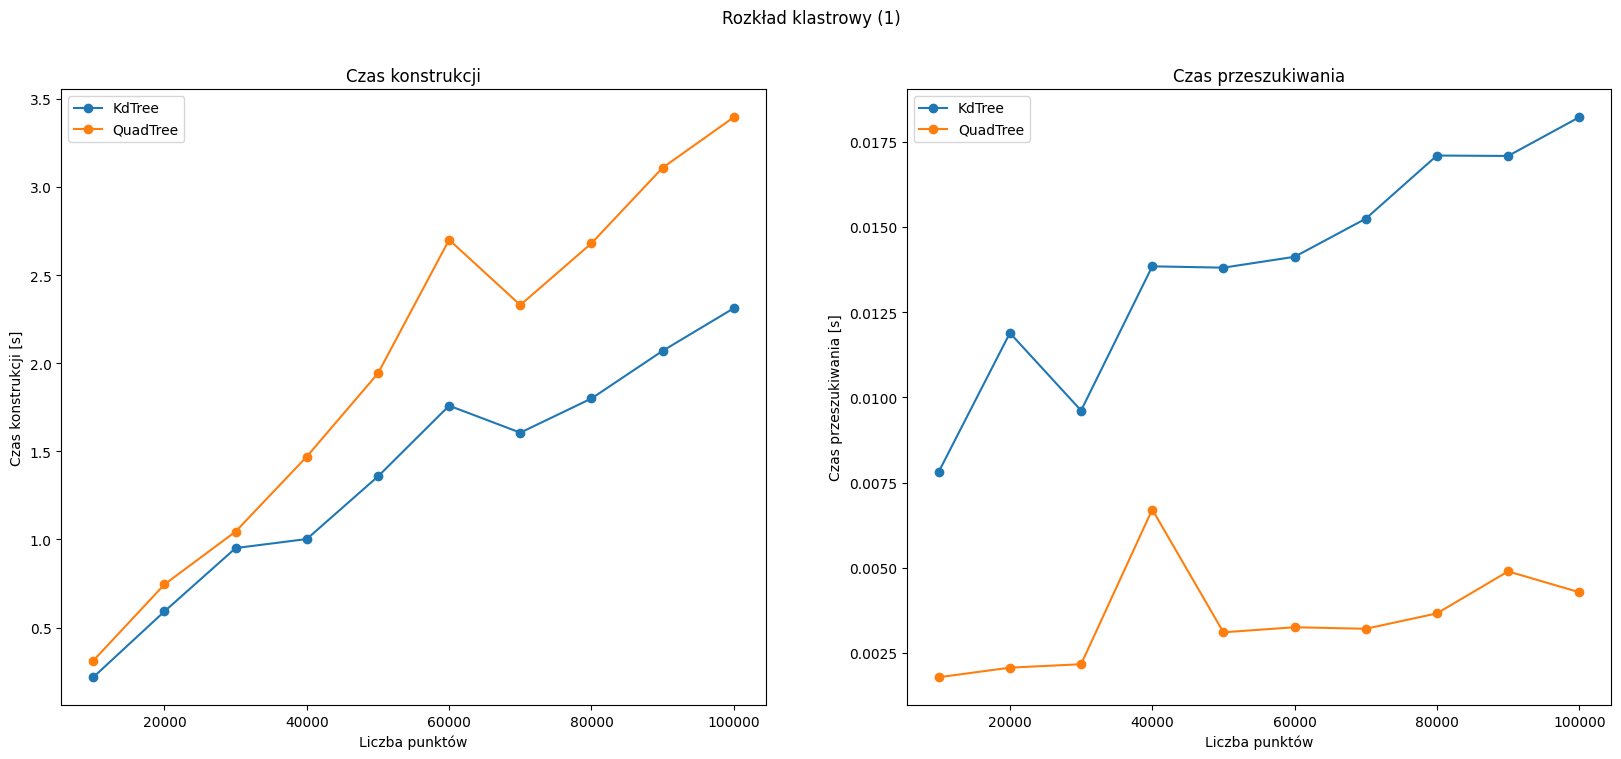

In [30]:
show_graphs(df4_1, "Rozkład klastrowy (1)")

3.4.2 Rozkład klastrowy (z dużą ilością punktów w przeszukiwanym obszarze)

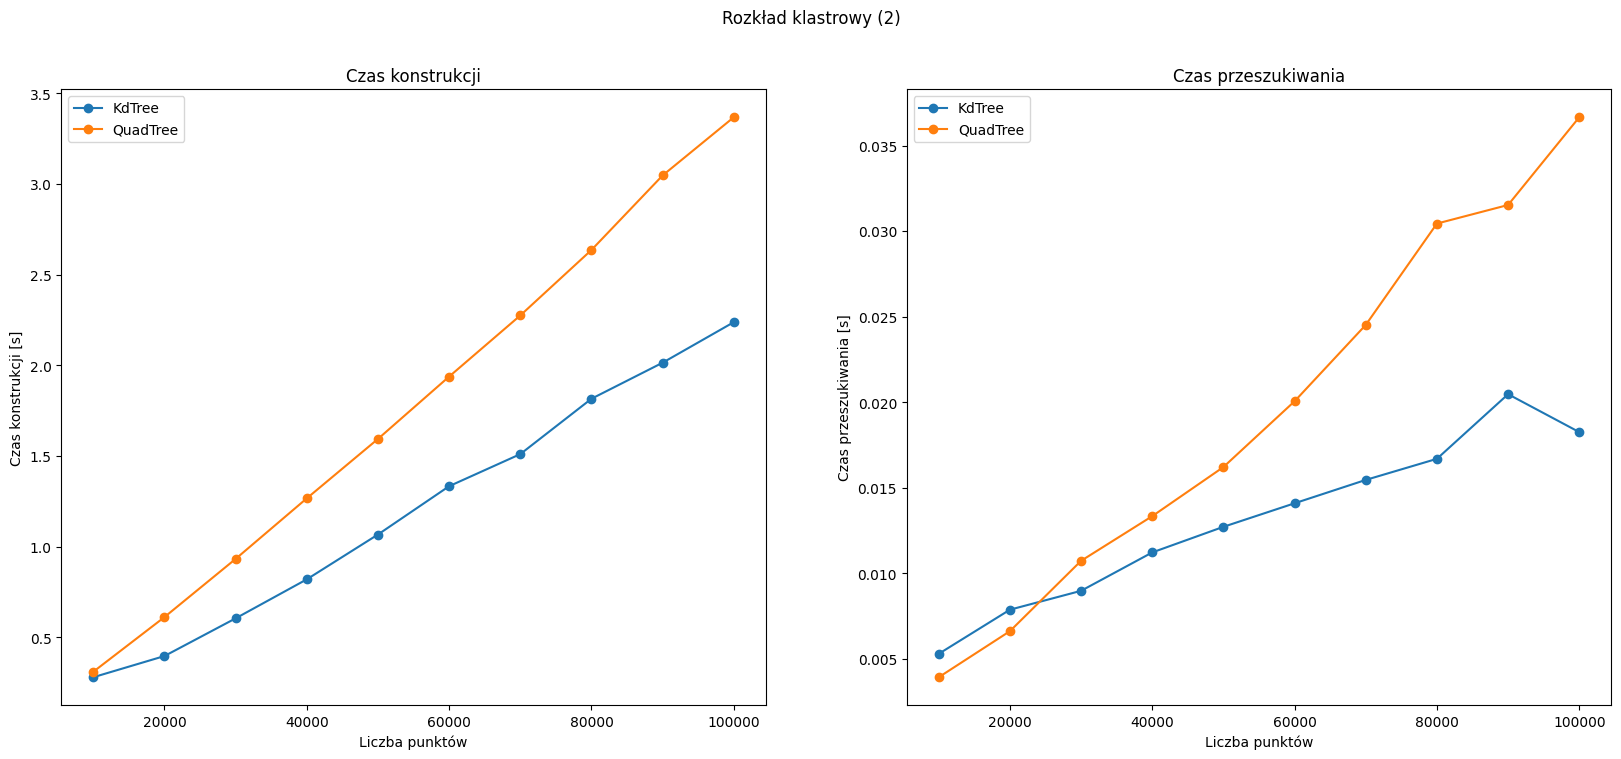

In [31]:
show_graphs(df4_2, "Rozkład klastrowy (2)")

3.5 Rozkład z wartościami odstającymi (z małą ilością punktów w przeszukiwanym obszarze)

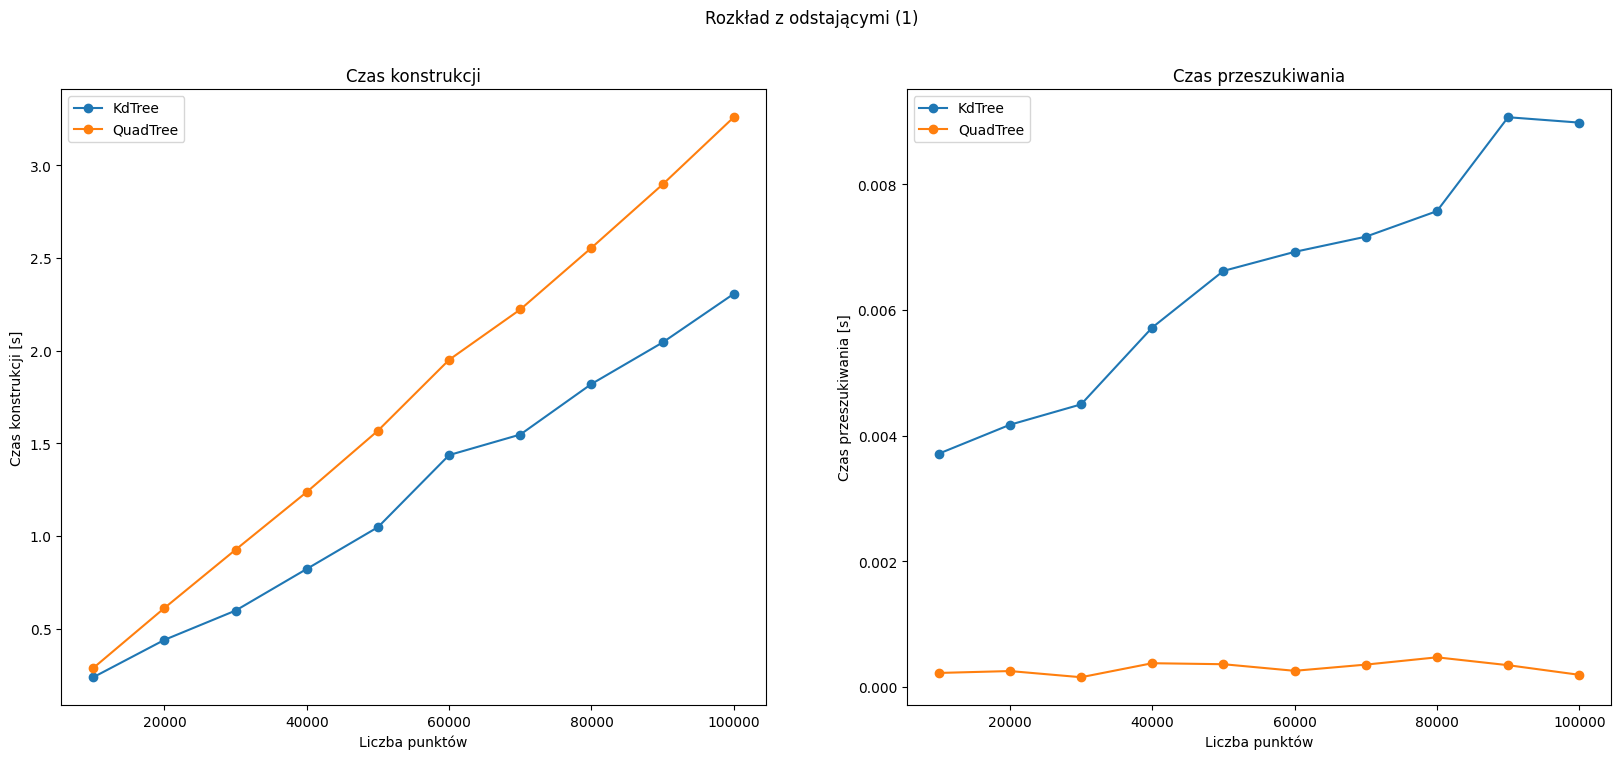

In [32]:
show_graphs(df5_1, "Rozkład z odstającymi (1)")

3.5.2 Rozkład z wartościami odstającymi (z dużą ilością punktów w przeszukiwanym obszarze)

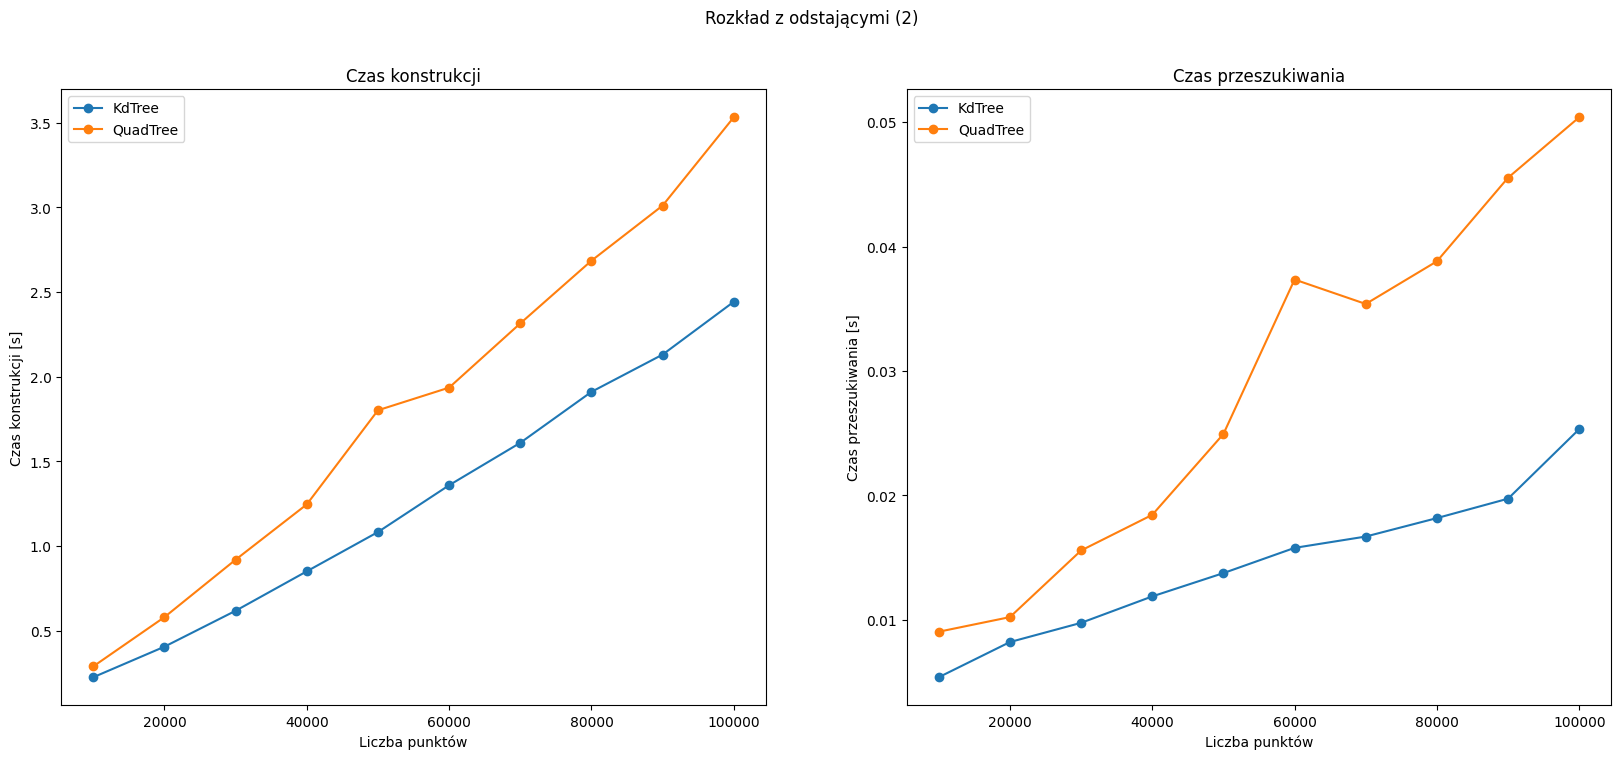

In [33]:
show_graphs(df5_2, "Rozkład z odstającymi (2)")

3.6 Rozkład krzyżowy

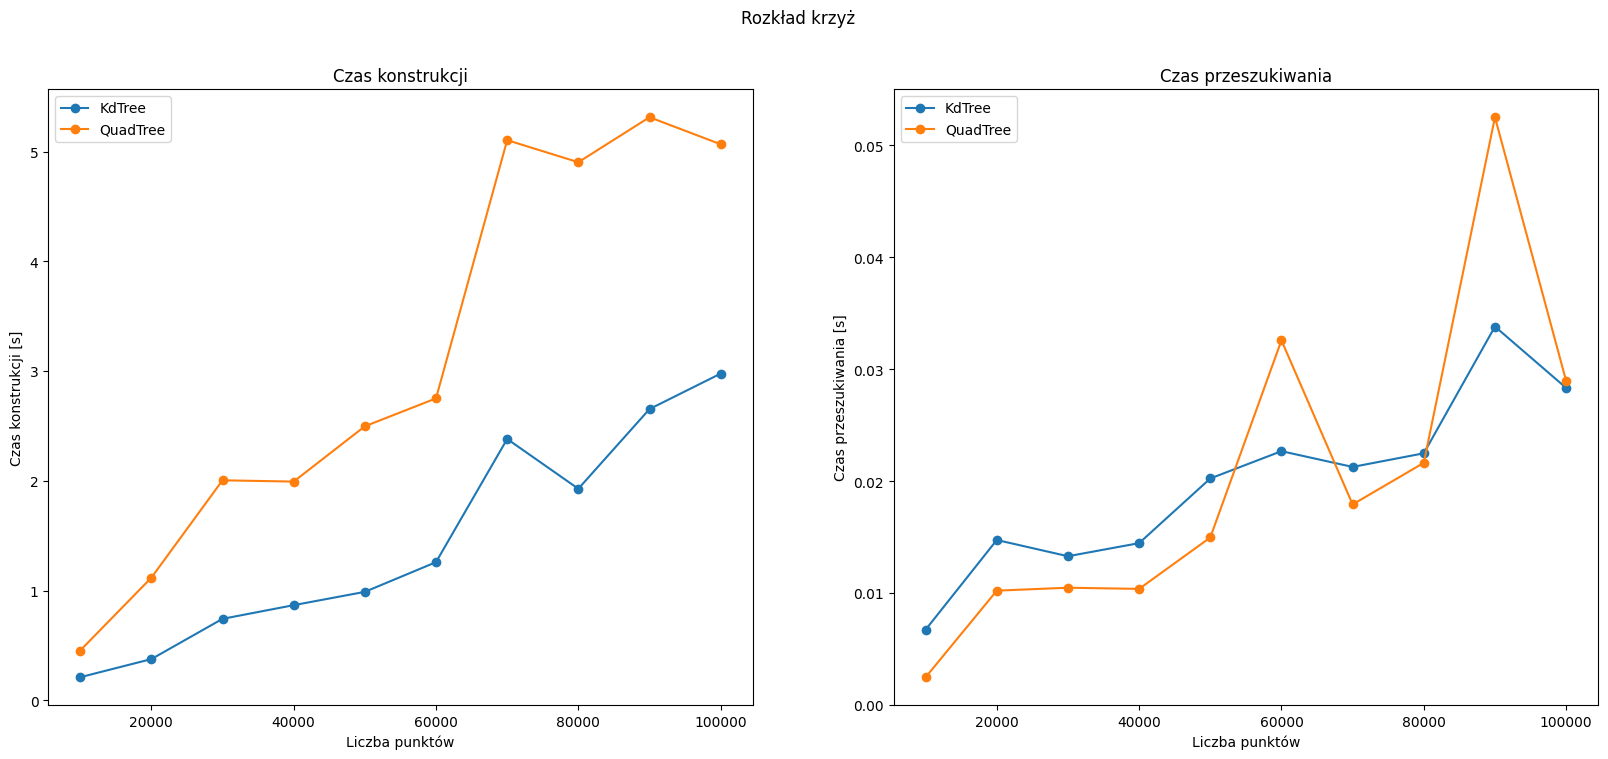

In [7]:
show_graphs(df6, "Rozkład krzyż")

3.7 Rozkład prostokątny

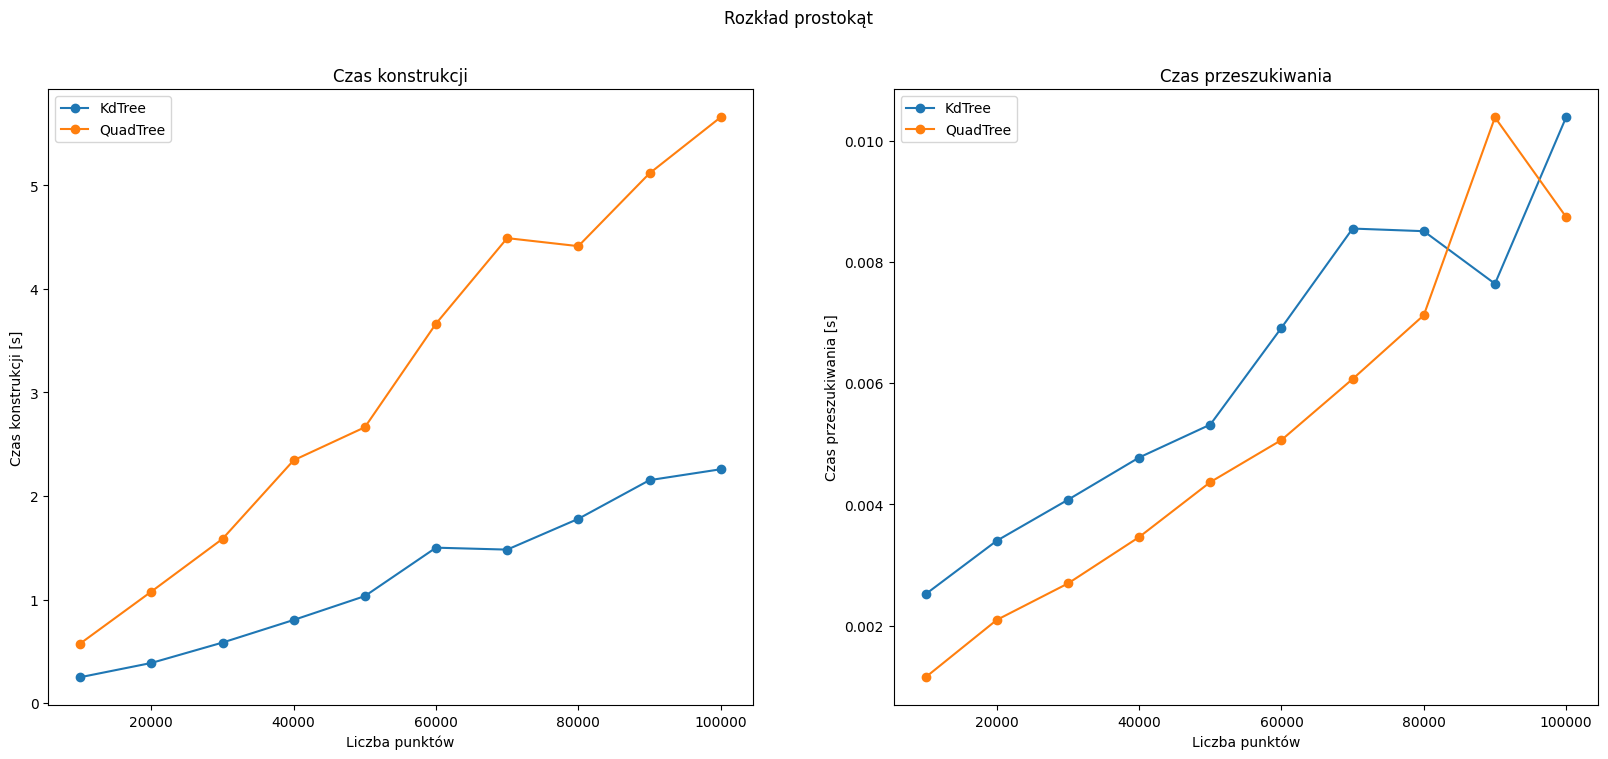

In [35]:
show_graphs(df7, "Rozkład prostokąt")

## 4. Pomiary dla indywidulanych przypadków pod zastosowania drzewa

4.1 Wydajność dla KDTree w zależności od ilości wymiarów

In [37]:
def kdim_compare():
    data = []
    for k in range(2, 11):
        points = cg.uniform_distribution(50000, Rectangle(Point([0 for _ in range(k)]), Point([100 for _ in range(k)])))
        tkk = timeit.timeit(lambda: KdTree(points, points_in_node=1), number=1)
        kd = KdTree(points, points_in_node=1)
        tks = timeit.timeit(lambda: kd.search_in_rectangle(Rectangle([25 for _ in range(k)], [75 for _ in range(k)])), number=1)
        data.append([tkk, tks])
    top = ["Wydajność KdTree w zależności od ilości wymiarów"]
    col = ["Czas konstrukcji [s]", "Czas przeszukiwania [s]"]
    idx = list(range(2, 11))
    df = pd.concat([pd.DataFrame(data, columns=col, index=idx)], axis=1, keys=top)
    return df

df_kdim = kdim_compare()
df_kdim

Wydajność KdTree w zależności od ilości wymiarów                        
                               Czas konstrukcji [s] Czas przeszukiwania [s]
2                                          1.495079                0.010616
3                                          1.116984                0.031141
4                                          1.259314                0.064905
5                                          1.606782                0.053456
6                                          1.874272                0.066066
7                                          1.460131                0.099288
8                                          1.671178                0.101590
9                                          1.539691                0.130346
10                                         1.489661                0.169993

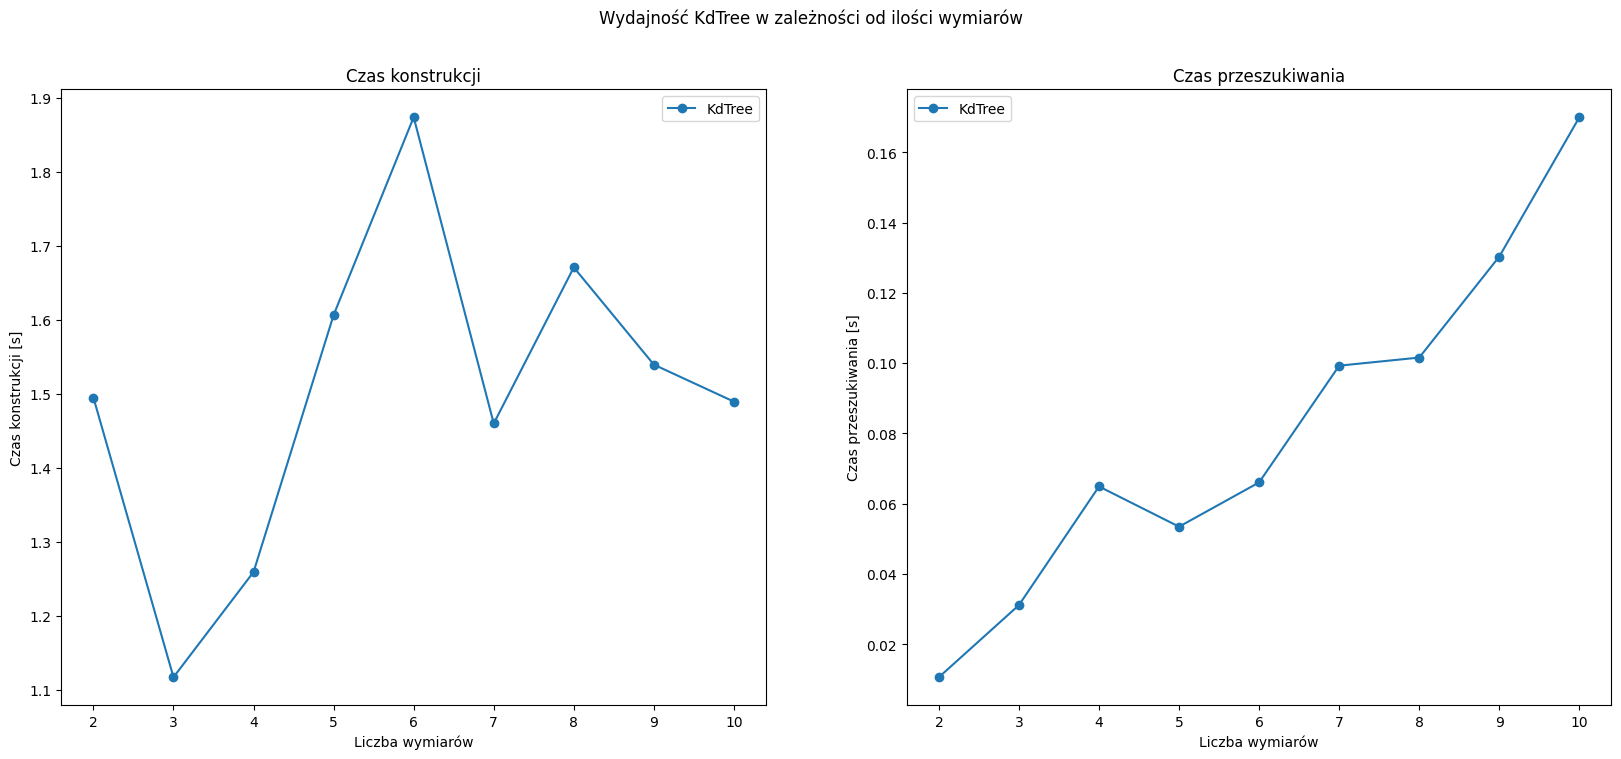

In [38]:
def kdim_graph(df, title = "Wydajność KdTree w zależności od ilości wymiarów"):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    fig.suptitle(title)
    ax1.title.set_text("Czas konstrukcji")
    ax1.plot(df[title]["Czas konstrukcji [s]"], label="KdTree", marker="o")
    ax1.set_ylabel("Czas konstrukcji [s]")
    ax1.set_xlabel("Liczba wymiarów")
    ax1.legend()
    ax2.title.set_text("Czas przeszukiwania")
    ax2.plot(df[title]["Czas przeszukiwania [s]"], label="KdTree", marker="o")
    ax2.set_ylabel("Czas przeszukiwania [s]")
    ax2.set_xlabel("Liczba wymiarów")
    ax2.legend()
    plt.show()

kdim_graph(df_kdim)

4.2 Wydajność dla QuadTree w zależności od wartości parametru `max_capacity`

In [39]:
def maxcap_compare():
    data = []
    for mc in range(1, 11):
        points = cg.uniform_distribution(50000, Rectangle(Point([0,0]), Point([100,100])))
        tqk = timeit.timeit(lambda: QuadTree(points, points_in_node=1, max_capacity=mc), number=1)
        qt = QuadTree(points, points_in_node=1, max_capacity=mc)
        tqs = timeit.timeit(lambda: qt.search_in_rectangle(Rectangle([25, 25], [75, 75])), number=1)
        data.append([tqk, tqs])
    top = ["Wydajność QuadTree w zależności od maksymalnej pojemności liścia"]
    col = ["Czas konstrukcji [s]", "Czas przeszukiwania [s]"]
    idx = list(range(1, 11))
    df = pd.concat([pd.DataFrame(data, columns=col, index=idx)], axis=1, keys=top)
    return df

df_maxcap = maxcap_compare()
df_maxcap

Wydajność QuadTree w zależności od maksymalnej pojemności liścia  \
                                               Czas konstrukcji [s]   
1                                            1.793640                 
2                                            1.492532                 
3                                            0.963364                 
4                                            1.312340                 
5                                            0.953098                 
6                                            0.880103                 
7                                            0.866502                 
8                                            1.021065                 
9                                            0.826105                 
10                                           0.761478                 

                            
   Czas przeszukiwania [s]  
1                 0.031513  
2                 0.015557  
3                 0.016182  
4                 0.016333  
5                 0.021107  
6                 0.016945  
7                 0.020004  
8                 0.017472  
9                 0.015976  
10                0.017117

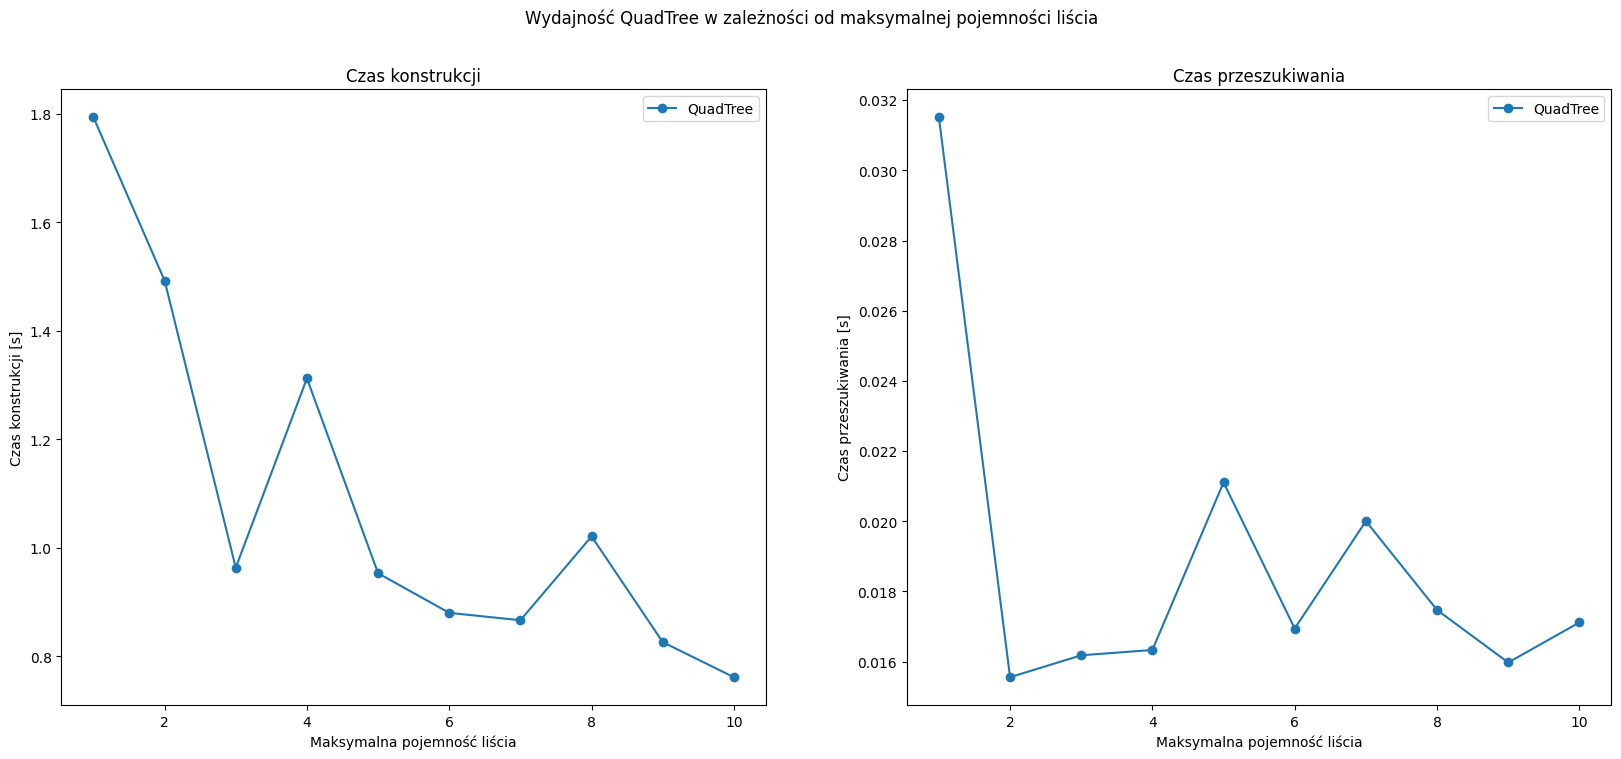

In [40]:
def maxcap_graph(df):
    title = "Wydajność QuadTree w zależności od maksymalnej pojemności liścia"
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
    fig.suptitle(title)
    ax1.title.set_text("Czas konstrukcji")
    ax1.plot(df[title]["Czas konstrukcji [s]"], label="QuadTree", marker="o")
    ax1.set_ylabel("Czas konstrukcji [s]")
    ax1.set_xlabel("Maksymalna pojemność liścia")
    ax1.legend()
    ax2.title.set_text("Czas przeszukiwania")
    ax2.plot(df[title]["Czas przeszukiwania [s]"], label="QuadTree", marker="o")
    ax2.set_ylabel("Czas przeszukiwania [s]")
    ax2.set_xlabel("Maksymalna pojemność liścia")
    ax2.legend()
    plt.show()

maxcap_graph(df_maxcap)

## 5. Wizualizacja powyższych zbiorów, oraz siatki.

In [22]:
import matplotlib.pyplot as plt
q_norm = 500
q_grid = (21,21)
q_clust = 165
q_out = (490, 10)
q_cross = (250,250)
def generate_visualization(func, quantity, shape,rec_for_search):
    vis_points = Visualizer()
    points = func(quantity,shape)
    vis_points.add_point(points)
    vis_points.show()
    vis_KD = KdTree_visualizer(points, points_in_node=False, visualize_gif=False)
    vis_QT = QuadTree_visualizer(points, points_in_node=False, visualize_gif=False)
    _,vis_rec1 = vis_KD.search_in_rectangle(rec_for_search, visualize_gif=False)
    _,vis_rec2 = vis_QT.search_in_rectangle(rec_for_search, visualize_gif=False)
    vis_points.show()
    vis_KD.vis.show()
    vis_QT.vis.show()
    vis_rec1.show()
    vis_rec2.show()

5.1 Rozkład równomierny

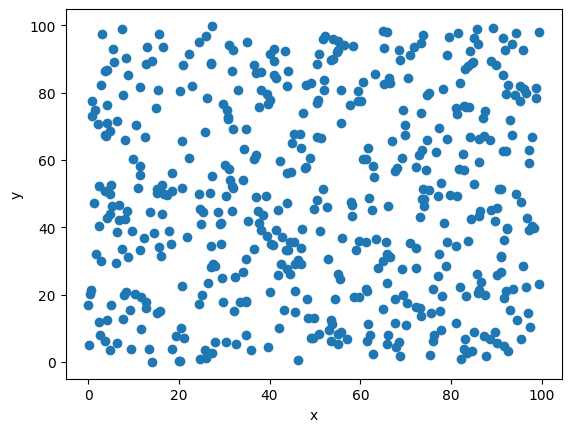

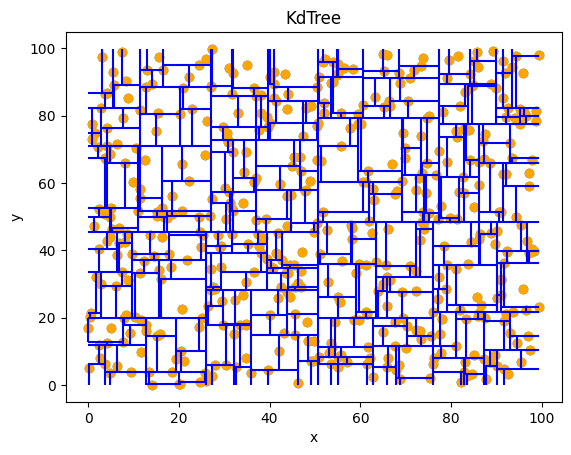

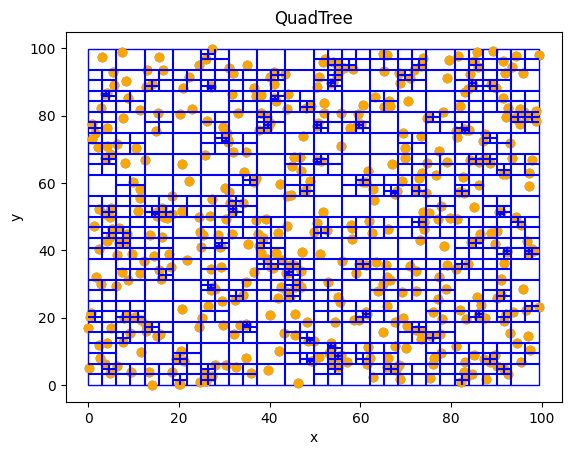

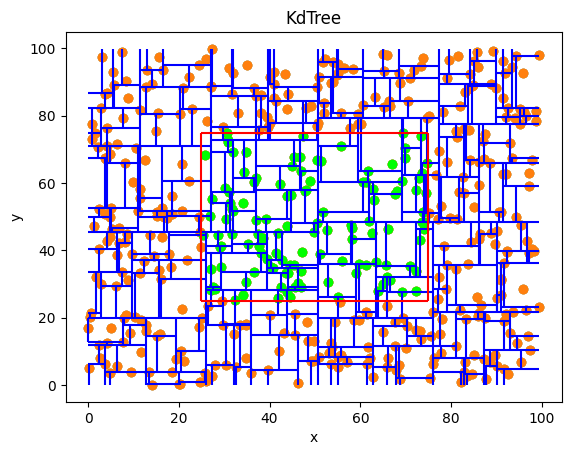

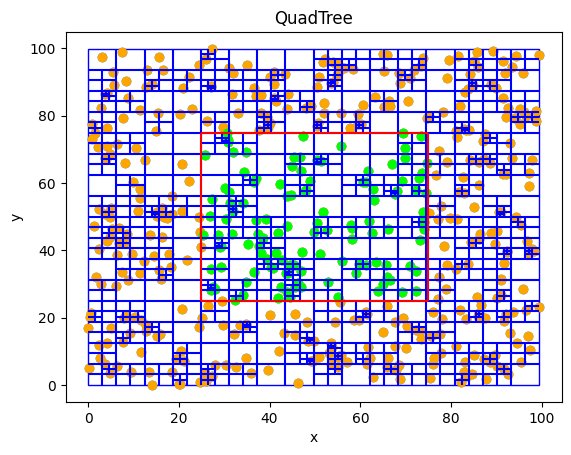

In [4]:
generate_visualization(cg.uniform_distribution, q_norm, Rectangle(Point([0,0]), Point([100,100])),Rectangle([25, 25], [75, 75]))

5.2 Rozkład normalny

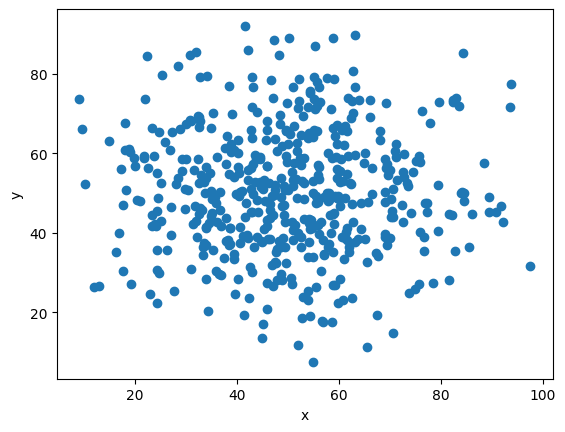

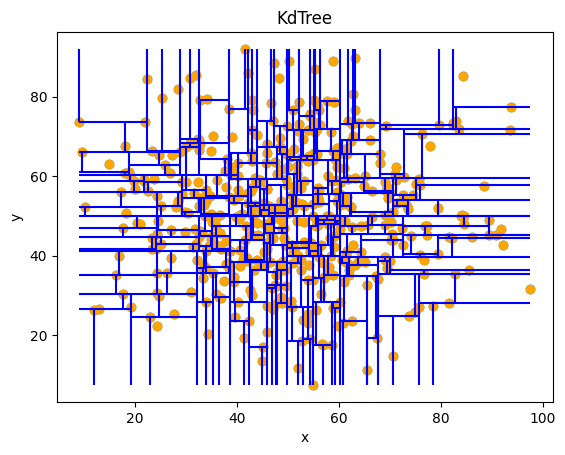

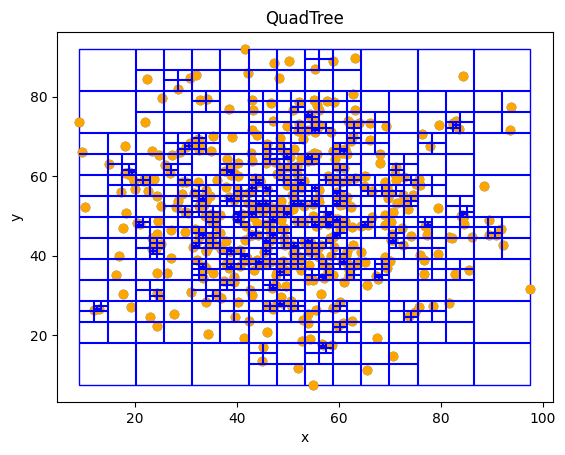

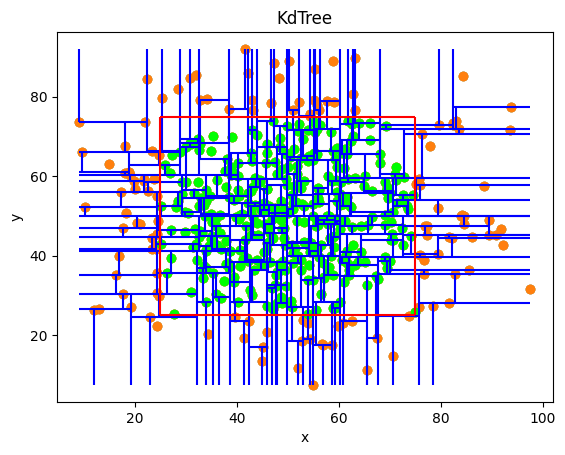

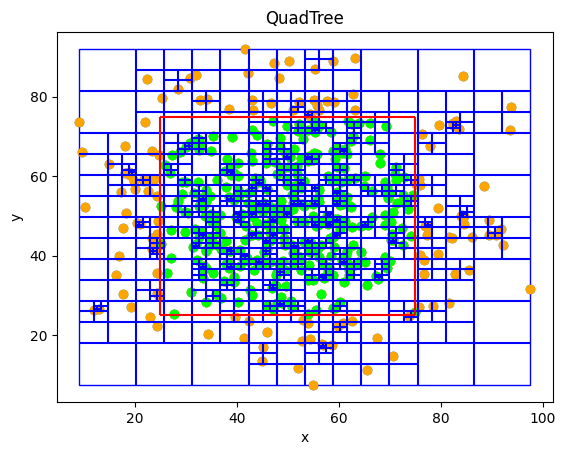

In [6]:
generate_visualization(cg.normal_distribution, q_norm, Rectangle(Point([0,0]), Point([100,100])),Rectangle([25, 25], [75, 75]))

5.3 Rozkład "posadzka"

AttributeError: 'KdTreeNode_v' object has no attribute '_points'

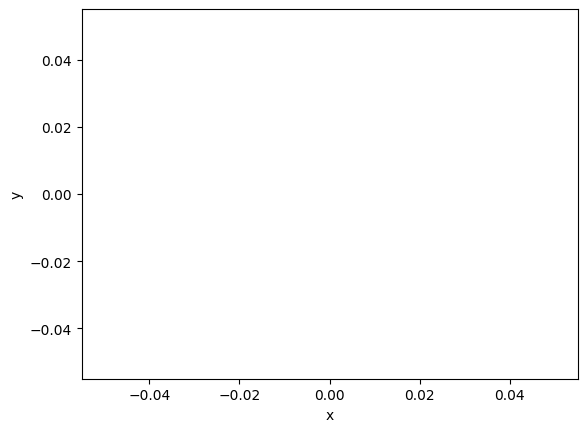

In [23]:
generate_visualization(cg.grid_distribution, q_grid, Rectangle(Point([0,0]), Point([100,100])),Rectangle([25, 25], [75, 75]))

5.4 Rozkład klastrowy

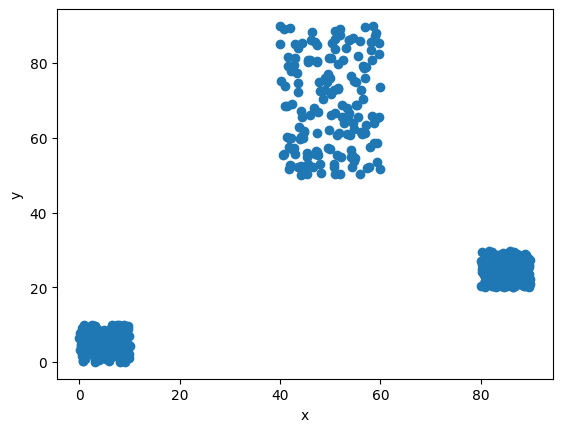

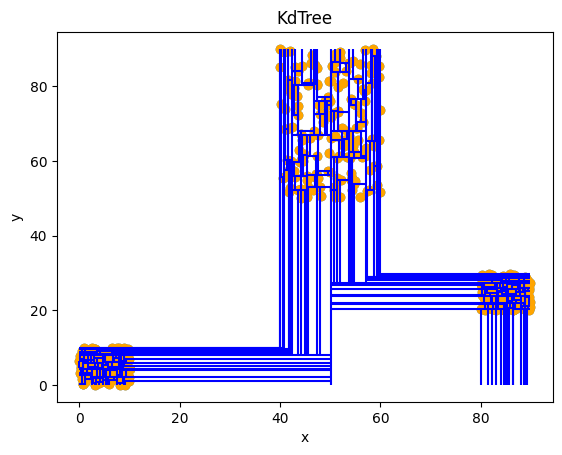

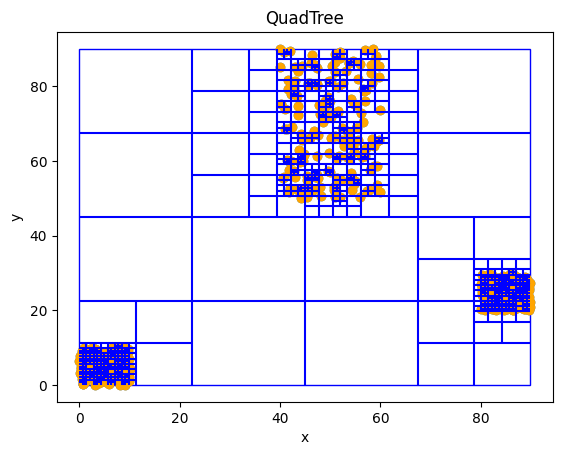

In [7]:
generate_visualization(cg.cluster_distribution, q_clust, (Rectangle(Point([0,0]), Point([10,10])), Rectangle(Point([40,50]), Point([60,90])), Rectangle(Point([80,20]), Point([90,30]))))

5.5 Rozkład z wartościami odstającymi

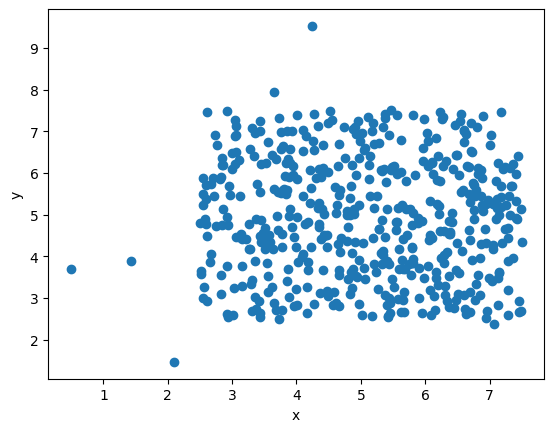

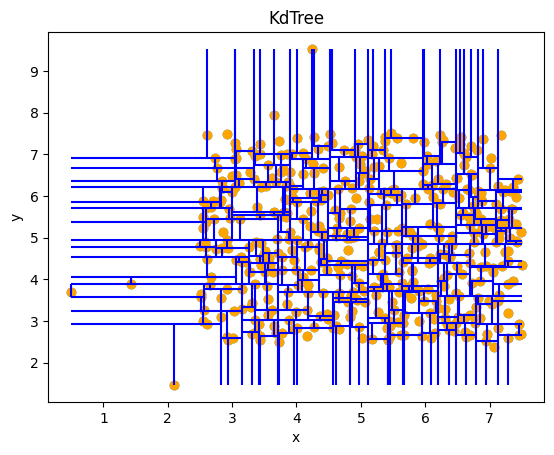

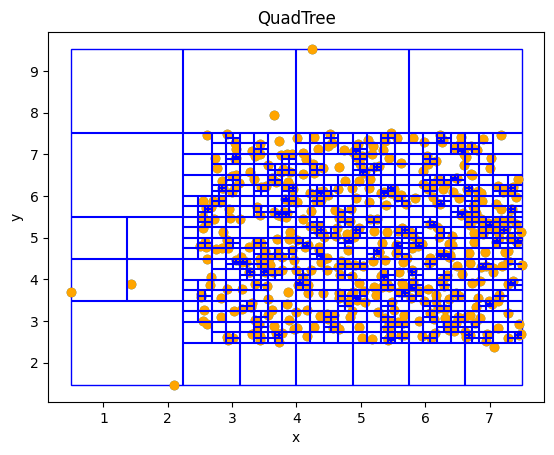

In [8]:
generate_visualization(cg.outliers_distribution, q_out, Rectangle(Point([0,0]), Point([10,10])))

5.6 Rozkład krzyżowy

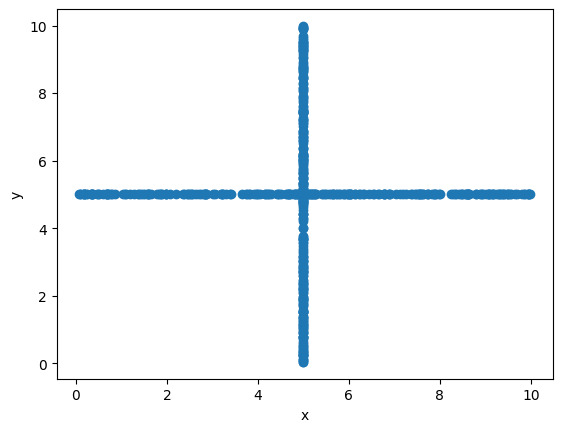

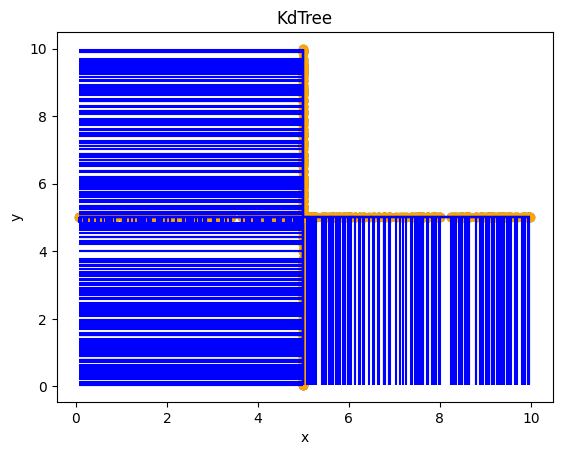

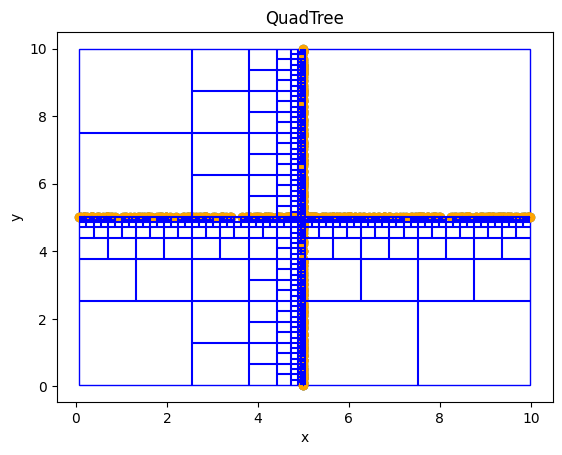

In [9]:
generate_visualization(cg.cross_distribution, q_cross, Rectangle(Point([0,0]), Point([10,10])))

5.7 Rozkład prostokątny

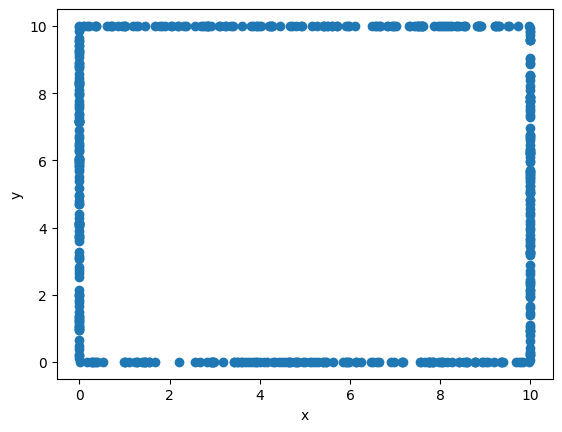

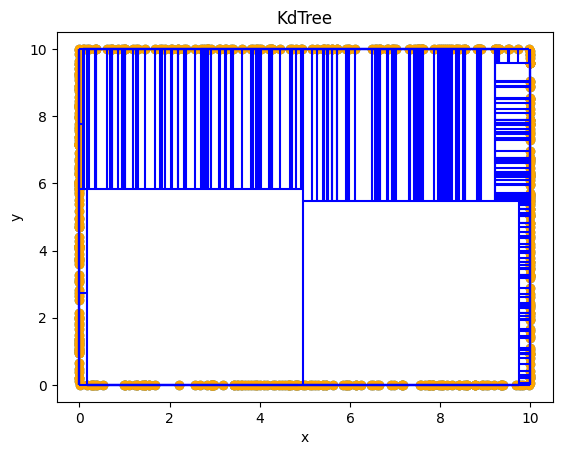

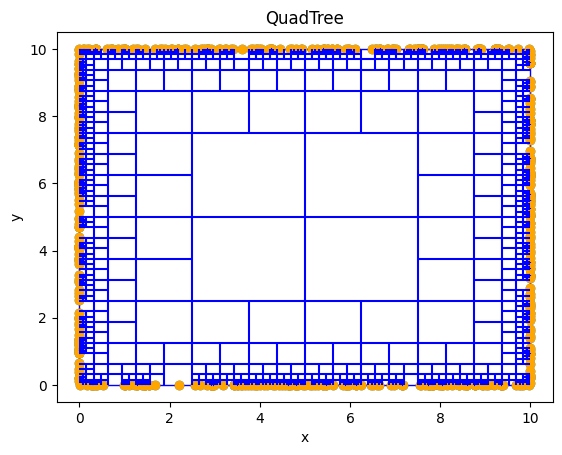

In [10]:
generate_visualization(cg.rectangle_distribution, q_norm, Rectangle(Point([0,0]), Point([10,10])))

------------------------------------------------------------------------------------------------------------------------------------------------